In [8]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [9]:
df = pd.read_csv('/content/SATARA_MAY2023-JULY2023_Updated.csv')

In [10]:
vegetation_density = 0.3 * df['Temperature'] + 0.2 * df['Humidity'] + 0.1 * df['Precipitation'] + 0.05 * df['Wind_speed']

df['Vegetation Density'] = vegetation_density

In [11]:
max_value = vegetation_density.max()
min_value = vegetation_density.min()
rescaled_vegetation_density = (vegetation_density - min_value) / (max_value - min_value)

# Step 4: Add Rescaled Vegetation Density to the DataFrame
df['Rescaled Vegetation Density'] = rescaled_vegetation_density

In [12]:
X = df[['Temperature', 'Humidity', 'Precipitation', 'Wind_speed']]
y = df['Rescaled Vegetation Density']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Step 5: Model Training and Evaluation
y_pred = rf_model.predict(X_test)


In [16]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0004715188702012911


In [17]:
# Defining the Threshold Values
dense_threshold = 0.74
sparse_threshold = 0.36

# Classifing Dense and Sparse Vegetation
df['Vegetation Class'] = 'Moderate'
df.loc[df['Rescaled Vegetation Density'] < dense_threshold, 'Vegetation Class'] = 'Dense'
df.loc[df['Rescaled Vegetation Density'] <= sparse_threshold, 'Vegetation Class'] = 'Sparse'


In [18]:
print(df)

   Month  Days  YEAR        Date  Min_Temperature  Temperature  \
0    May     1  2023  01-05-2023            16.69        20.71   
1    May     2  2023  02-05-2023            17.34        19.51   
2    May     3  2023  03-05-2023            13.88        21.78   
3    May     4  2023  04-05-2023            11.23        21.81   
4    May     5  2023  05-05-2023            12.65        21.56   
..   ...   ...   ...         ...              ...          ...   
85  July    86  2023  25-07-2023             2.94        21.31   
86  July    87  2023  26-07-2023             3.31        21.64   
87  July    88  2023  27-07-2023             2.15        21.92   
88  July    89  2023  28-07-2023             3.38        21.58   
89  July    90  2023  29-07-2023             4.19        21.43   

    Max_Temperature  Humidity  Precipitation  Surface_Pressure  Wind_speed  \
0             37.40     11.05           0.04             93.45        2.87   
1             36.84     11.23           0.00       

NOte : 
The Range between 0.2 - 0.36 is Sparse Vegetaion 
The Range between 0.36 - 0.8 is Dense Vegetaion 


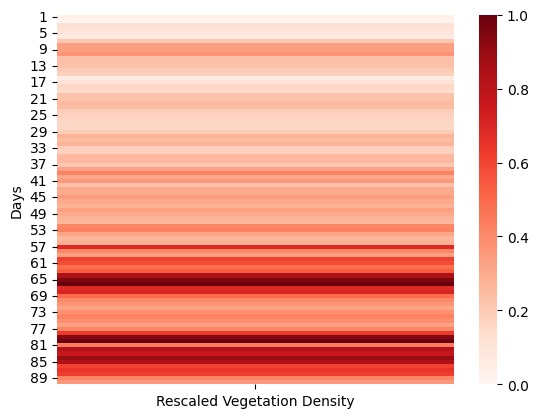

In [19]:
import seaborn as sns
Vegetation_Class = pd.pivot_table(df, values='Rescaled Vegetation Density', index=['Days'])
sns.heatmap(data = Vegetation_Class, cmap='Reds')
print("NOte : ")
print("The Range between 0.2 - 0.36 is Sparse Vegetaion ")
print("The Range between 0.36 - 0.8 is Dense Vegetaion ")

In [23]:
df.to_csv('Complete_Data.csv', index=False)
from google.colab import files
files.download('Complete_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>